## Local Correlation Matrix

### 1. Generate random graph

In [207]:
import networkx as nx

n = 10
prob = .6

graph = nx.erdos_renyi_graph(n, prob)
adjacency = nx.to_numpy_matrix(graph).A

### 2. Estimate steady state

In [208]:
F = .5
B = .2
R = 3

# todo division by zero if degree be 0
steady = [F/(R/graph.degree(i) + B) for i in range(0,n)]
print('steady_state\n', steady)

steady_state
 [0.625, 0.4166666666666667, 0.5263157894736842, 0.5263157894736842, 0.7954545454545455, 0.7142857142857143, 0.625, 0.7142857142857143, 0.7954545454545455, 0.625]


### 3. Calculate R

In [209]:
perturbation = .2

def q_bar_prime_i(i, j):
    x_old = steady[i]
    x_new = x_old + perturbation
    return -F*perturbation/(R*x_old*x_new*steady[j])
    
def q_bar_prime_j(i, j):
    x_old = steady[j]
    x_new = x_old + perturbation
    return -(F-B*steady[i])*perturbation/(R*x_old*x_new*steady[i])


def r_i_j(i,j):
    if adjacency[i,j] == 0:
        return 0
    
    sum = 0
    for k in range(0,n):
        if adjacency[i,k] == 1:
            sum = sum + q_bar_prime_i(i,k)
    
    return steady[j]*q_bar_prime_j(i,j)/(steady[i]*sum)


r = np.array([[r_i_j(i,j) for j in range(0,n)] for i in range(0,n)])

print('adjacency\n', adjacency)
print('r\n', r)

adjacency
 [[0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
 [0. 1. 1. 1. 1. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 1. 1. 0.]]
r
 [[0.         0.         0.         0.         0.13704023 0.14920645
  0.16535433 0.14920645 0.         0.16535433]
 [0.         0.         0.33577609 0.33577609 0.         0.
  0.         0.         0.24499308 0.        ]
 [0.         0.27979635 0.         0.         0.17332894 0.18871681
  0.         0.         0.17332894 0.        ]
 [0.         0.26538624 0.         0.         0.         0.17899749
  0.19836951 0.         0.16440213 0.        ]
 [0.09614435 0.         0.10920744 0.         0.         0.08675525
  0.09614435 0.08675525 0.07968127 0.09614435]
 [0.11898122 0.         0.13514715 0.13514715 0.09860773 0.
  0.         0.10736196 0.09

## Correlation Matrix

### 1. Solve linear equations system

In [210]:
def _g(i, j):
    if i == j:
        return syms[i][j] - 1
    
    eq = syms[i][j]
    for q in range(0,n):
        eq = eq - r[i,q]*syms[q][j]
    return eq

In [211]:
from sympy import symbols, solve_poly_system

syms = [[symbols('{}_{}'.format(i,j)) for i in range(0,n)] for j in range(n)]
eq_system = [_g(int(cnt/n),cnt%n) for cnt in range(0,n*n)]
                        
g = solve_poly_system(eq_system)
print('g\n', g)

# todo: convert g to matrix

g
 [(1.00000000000000, 0.127780109701350, 0.137322328333978, 0.152295718221222, 0.221065855581381, 0.220706147677715, 0.294347057990695, 0.265416770659100, 0.124629218149735, 0.307046133434140, 0.0845159930610677, 1.00000000000000, 0.364819114118404, 0.351417242169189, 0.106338546832001, 0.148798429828317, 0.115286763177605, 0.0889580722424666, 0.222181327300113, 0.0931657810689652, 0.116367156250344, 0.467402687476730, 1.00000000000000, 0.226173349530400, 0.190951529190863, 0.233152484826213, 0.116103691202967, 0.115049054799904, 0.227283972518104, 0.115188706896981, 0.134923545432052, 0.470703551887017, 0.236457023440584, 1.00000000000000, 0.125320626281600, 0.231812681987618, 0.251542433004793, 0.129909794900043, 0.226662945335322, 0.134164139136267, 0.319817558947101, 0.232592503789115, 0.325997682355132, 0.204645943231359, 1.00000000000000, 0.260137744307302, 0.301659105403229, 0.278135171003869, 0.222108579068577, 0.318001331635299, 0.278819226122217, 0.284204528261305, 0.3475834

### 2. Plot distribution of G

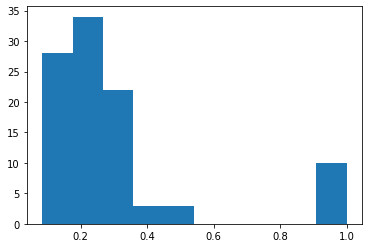

In [212]:
import matplotlib.pyplot as plt

count, bins, patches = plt.hist([float(f) for f in list(g[0])])
plt.show()